<a href="https://colab.research.google.com/github/jugernaut/MACTI-manejodatos/blob/principal/Simulacion/03_TeoriaDeFilas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Teoría de Filas</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M. en C. Miguel Angel Pérez León</i></h5>
  <h5 align="center"><i>Ayudante: Jesús Iván Coss Calderón</i></h5>
  <h5 align="center"><i>Ayudante: Jonathan Ramírez Montes</i></h5>
  <h5 align="center"><i>Materia: Manejo de Datos</i></h5>
</font>

# Introducción

Frecuentemente en el estudio de fenómenos naturales o sociales, se presentan situaciones en las cuales se agrupan elementos en formas de linea en espera de ser atendidos o procesados.

También con mucha frecuencia es de importancia tratar de averiguar mediante una simulación cual será el patrón de espera para ser atendido o procesado, cuanto tiempo tardara un individuo en completar una labor o cuanto tiempo tomará completar una determinada labor.

La parte teórica de este análisis se realiza mediante al disciplina conocida como **teoría de filas**, esta área de las ciencias trata de predecir mediante elementos matemáticos las variables y procesos que intervienen en una situación en la cual se presente una o más filas.

En nuestro curso esto es de relevancia ya que la parte teórica ayuda al momento de entender el funcionamiento de un sistema complejo, como lo pude ser todo aquel en el que intervienen varios individuos o procesos y por otro lado mediante algún lenguaje de programación podemos realizar la simulación que corrobore el análisis teórico.

En materias como **Investigación de Operaciones** o **Programación Lineal** se profundiza en conceptos importantes al tratar de optimizar el desempeño de un sistema complejo, pero para nuestro curso será más que suficiente conocer los elementos básicos de la teoría de filas.

Las filas aparecen frecuentemente en muchas situaciones como un banco, un hospital, un concierto, etc. Así que es importante dedicar un poco de tiempo a su análisis.

<center>
<img src="https://github.com/jugernaut/ManejoDatos/blob/desarrollo/Imagenes/Simulacion/tiaaly.png?raw=1" width="800">
</center>

# Características importantes

En general a nadie le gusta esperar, cuando la paciencia llega a su limite la gente decide irse a otro lugar, sin embargo un servicio muy rápido tendría un costo muy elevado, así que la idea es encontrar un balance entre ambos.

# Notación básica (Kendall)

Con el paso del tiempo se ha implantado una notación para representar los problemas de filas que consta de 5 símbolos separados por barras.

$$A / B / X /Y / Z$$

*   $A$: indica la distribución de tiempo entre llegadas consecutivas.
*   $B$: alude al patrón de servicio de servidores.
*   $X$: es el número de canales de servicio.
*   $Y$: es la restricción en la capacidad del sistema.
*   $Z$: es la disciplina de fila.

<center>
<img src="https://github.com/jugernaut/ManejoDatos/blob/desarrollo/Imagenes/Simulacion/patrones.png?raw=1" width="800">
</center>



# Atención de procesos (clientes)

El tiempo que transcurre entre 2 llegadas consecutivas de procesos o el tiempo que tarda en ser atendido un procesos pueden ser muy variados.

A este tiempo se le conoce como **tiempo entre llegadas** y **tiempo entre servicios**.

El número esperado de llegadas por unidad de tiempo se conoce como **tasa media de llegadas**. Y el numero de servicios por unidad de tiempo se conoce como **tasa media de servicios**.

## Distribuciones

A la forma en como van llegando los procesos para ser atendidos se le conoce como distribución.

Principalmente vamos a contar con 2 tipos de distribución.

## Distribución Determinista

Esta distribución (patrón de llegada o atención) corresponde a una situación donde constantemente cada $n$ cantidad de tiempo llega un proceso o es atendido un proceso.

El valor $n$ no se modifica a lo largo del tiempo y **se mantiene constante** durante todo momento.

Si lo pensamos en código, esta distribución corresponde a lo siguiente.

In [ ]:
import time

# Distribucion de llegada
for _ in range(5):
  print("Ha llegado un cliente")
  time.sleep(2)

# Distribucion de servicio
for _ in range(5):
  print("Un cliente ha sido atendido")
  time.sleep(2)

Ha llegado un cliente
Ha llegado un cliente
Ha llegado un cliente
Ha llegado un cliente
Ha llegado un cliente
Un cliente ha sido atendido
Un cliente ha sido atendido
Un cliente ha sido atendido
Un cliente ha sido atendido
Un cliente ha sido atendido


### Distribución Exponenecial

La primer forma de distribuir los tiempos de llegada y de servicio se conoce como **Distribución Exponencial**.

$$P\left(t\right)=\lambda*e^{\left(-\lambda t\right)}$$

Para $t = 0,1,2,3,.....$ Donde:
*   $P(t) =$ Probabilidad de $k$ arribos/servicios.
*   $t =$ Número de arrivos/servicios por unidad de tiempo
*   $\lambda =$ Tasa promedio de arrivos/servicios por unidad de tiempo.

interactive(children=(FloatSlider(value=0.1, description='lam', max=0.5), Output()), _dom_classes=('widget-int…

<function __main__.distExponencial(lam)>

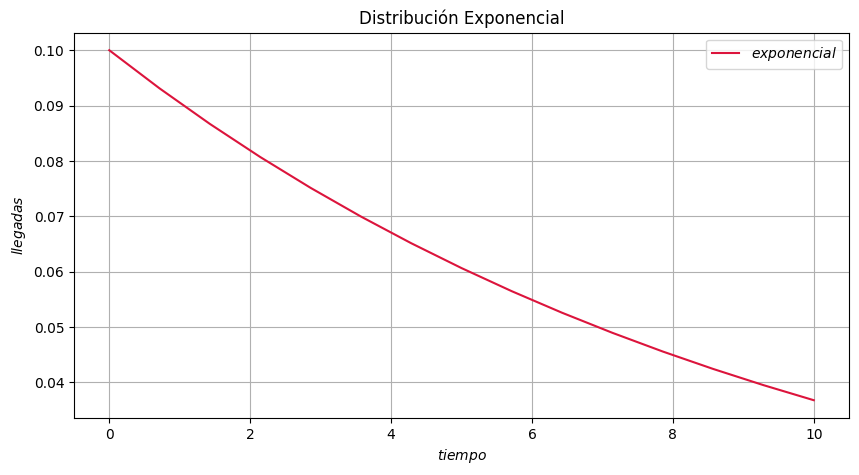

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

def distExponencial(lam):
  # tamano de la imagen
  plt.figure(figsize=(10,5))
  # dominio en el cual se genera la grafica
  x = np.linspace(0,10,15)
  # tipo de sitribucion
  distribucion = lam*np.exp(-x*lam)
  # se grafican ambas rectas
  plt.plot(x,distribucion,label = '$exponencial$', color='crimson')
  plt.xlabel('$tiempo$')
  plt.ylabel('$llegadas$')
  plt.title('Distribución Exponencial')
  plt.grid()
  plt.legend()

interact(distExponencial, lam=widgets.FloatSlider(min=0.0,max=0.5,step=0.1,value=0.1))


### Distribución de Poisson

La segunda forma más común de distribución, es la **Distribución de Poisson**.

$$P\left(t\right)=\frac{\lambda^{t}e^{-\lambda}}{t!}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from ipywidgets import interact
import ipywidgets as widgets

def distPoisson(lam):
  # tamano de la imagen
  plt.figure(figsize=(10,5))
  # dominio en el cual se genera la grafica
  x = np.linspace(0,10,15)
  # tipo de sitribucion
  distribucion = (lam**(x)*np.exp(-lam))/(scipy.special.factorial(x))
  # se grafican ambas rectas
  plt.plot(x,distribucion,label = '$poisson$', color='crimson')
  plt.xlabel('$tiempo$')
  plt.ylabel('$llegadas$')
  plt.title('Distribución de Poisson')
  plt.grid()
  plt.legend()

interact(distPoisson, lam=widgets.FloatSlider(min=0.0,max=0.5,step=0.1,value=0.1))

interactive(children=(FloatSlider(value=0.1, description='lam', max=0.5), Output()), _dom_classes=('widget-int…

<function __main__.distPoisson(lam)>

# Modelos

A continuación veremos algunos modelos de sistemas en los que se forman filas.

## Modelo $D/D/1$

Este es de los sistemas más sencillos de analizar, ya que básicamente todo es constante y solo se tiene un servidor o fila.

Es un sistema de filas de espera, con llegadas constantes, tiempo de servicio constante, con un servidor o fila de servicio.

Supongamos que $\lambda$ es el **tiempo de llegada**, sea $\lambda=5$ minutos, es decir cada $5$ minutos llega un cliente. Y sea $\mu=4$ minutos el **tiempo de servicio**. Si nos detenemos a analizar un poco esta situación, dado que $\lambda > \mu$ esto significa que cada cliente es atendido antes de que llegue un cliente nuevo, por lo tanto no se forma una fila.

<center>
<img src="https://github.com/jugernaut/ManejoDatos/blob/desarrollo/Imagenes/Simulacion/dd1.gif?raw=1" width="600">
</center>

Modelos que funcionan de esta forma son por ejemplo las **lineas de ensamblaje**, donde se tienen patrones de llegada y de servicio deterministas y no se forman filas.

Sin embargo vale la pena preguntarnos ¿qué sucede si $\lambda < \mu$?, esta situación se muestra a continuación.

<center>
<img src="https://github.com/jugernaut/ManejoDatos/blob/desarrollo/Imagenes/Simulacion/dd1espera.gif?raw=1" width="600">
</center>

En esta situación surgen varias preguntas:

*   ¿Cuanto tiempo espera un cliente en la fila?
*   Además de agilizar el tiempo de servicio, ¿se puede hacer algo más para evitar que los clientes esperen en la fila?



## Modelo $M/M/1$

En este modelo tanto el patrón de llegada, como el patrón de servicio son de tipo probabilistico y como ya vimos previamente se tienen 2 tipos de distribuciones principalmente.

Volvemos a tener un solo servidor o fila de espera.

### Ejemplo

Sea $\lambda=100$ personas por hora y $\mu=20$ personas atendidas cada $10$ minutos (es decir $120$ personas por hora). Tratemos de ver que sucede con el sistema.

El **número de clientes que esperan en la fila** está dado por:
$$L_{s}=\frac{\lambda^{2}}{\mu\left(\mu-\lambda\right)}=\frac{100^{2}}{\left(120\right)\left(120-100\right)}=1.04$$

El **tiempo que un cliente espera en la fila** está dado por:
$$W_{q}=\frac{\lambda}{\mu\left(\mu-\lambda\right)}=\frac{100}{\left(120\right)\left(120-100\right)}=0.01\,horas\times\frac{60min}{1hora}=0.6min\frac{60seg}{1min}=36seg$$

El **número de clientes en el sistema** está dado por:
$$L_{q}=\frac{\lambda}{\mu-\lambda}=\frac{100}{120-100}=\frac{100}{20}=5$$

El **tiempo que los clientes espéran en el sistema**:
$$W_{s}=\frac{1}{\mu-\lambda}=\frac{1}{120-100}=\frac{1}{20}=0.05\,horas\times\frac{60min}{1hora}=3min\frac{60seg}{1min}=180seg$$

# Otros Modelos

Existen muchas variantes de modelos en los que se forman filas.

## Una fila multiples servidores

<center>
<img src="https://github.com/jugernaut/ManejoDatos/blob/desarrollo/Imagenes/Simulacion/unfms.png?raw=1" width="600">
</center>

## Varias filas multiples servidores

<center>
<img src="https://github.com/jugernaut/ManejoDatos/blob/desarrollo/Imagenes/Simulacion/vfvm.png?raw=1" width="600">
</center>

## Una filas varios servidores

<center>
<img src="https://github.com/jugernaut/ManejoDatos/blob/desarrollo/Imagenes/Simulacion/ufvs.png?raw=1" width="600">
</center>

# Costo-Calidad

La finalidad de la teoría de filas y su simulación es encontrar un equilibro para el **costo-calidad** en un sistema.

*   **Costos en la fila**: el costo en la fila del sistema es el tiempo que el cliente (proceso) pierde esperando a ser atendido. Un sistema con un **bajo costo** es la finalidad de todo modelo de fila.
*   **Costos de servicio**: es el costo de operación por servicio, uno de los objetivos de la teoría de filas es, **mantener el costo total mínimo y maximizar el número de clientes atendidos**.

Otros objetivos del análisis de un sistema son:

*   Identificar el **nivel óptimo de capacidad del sistema, que minimiza el coste del mismo**.
*   Evaluar el impacto que las posibles alternativas de modificación de la capacidad del sistema tendrían en el coste total del mismo.

<center>
<img src="https://github.com/jugernaut/ManejoDatos/blob/desarrollo/Imagenes/Simulacion/mapacon.png?raw=1" width="900">
</center>

# Ejercicio

Supongamos que en una estación con un solo servidor llegan en promedio 45 clientes por hora.

Se tiene capacidad para atender en promedio 60 clientes por hora.

Se sabe que los clientes esperan en promedio 3 minutos en la fila.

Responde las siguientes preguntas:

*   ¿Cuál es el tiempo promedio que un cliente pasa en el sistema?
*   ¿Cuál es número promedio de clientes en la fila?
*   ¿Cuál es el número promedio de cliente en el sistema?
*   ¿Qué tipo de modelo es este?



# Referencias

* [Modelos de filas](https://www.um.es/or/ampliacion/node7.html).
* [Teoría de Colas](https://hopelchen.tecnm.mx/principal/sylabus/fpdb/recursos/r89798.PDF).
* [Teoría de filas](https://www.ecured.cu/Teor%C3%ADa_de_colas).
* [Notación Kendall.](http://www.lcc.uma.es/~ezeqlr/ios/Tema5.pdf)
* [Invesigación operativa.](https://idus.us.es/bitstream/handle/11441/77595/Esteban%20Vel%C3%A1zquez%20Gabriel%20TFG.pdf?sequence=1)
* [Modelos D/D/1.](https://www.um.es/or/ampliacion/node5.html)


